<a href="https://colab.research.google.com/github/computational-neurology/workshop2025/blob/main/04_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fitting
As you have probably seen by now, it is not easy to determine which parameters give rise to the simulated timeseries just judging by the eye. We need some metrics to be sure of the similarity between empirical and simulated data. One example is to fit the simulated functional connectivity to the empirical functional connectivity by maximizing the correlation between the two matrices (this is just one way to fit)

In [1]:
%%capture
import sys
!{sys.executable} -m pip install git+https://github.com/neurolib-dev/neurolib.git
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install nilearn


# @title Run this to install dependencies

In [2]:
# Let's import all the relevant libraries
from neurolib.models.hopf import HopfModel

In [3]:
# The brain network dataset
from neurolib.utils.loadData import Dataset

# Some useful functions are provided here
import neurolib.utils.functions as func

In [4]:
ds = Dataset("hcp")

The Dataset class in neurolib allows you to load some resting-state fMRI BOLD series for 7 healthy subjects which you can access as:

In [9]:
len(ds.BOLDs)
ts = ds.BOLDs[0]
print(ts)

[[ 8906.476245  8892.865209  8865.492871 ...  8900.259178  8890.81162
   8902.48663 ]
 [ 8343.544298  8331.875626  8310.290245 ...  8355.344199  8348.260956
   8353.575089]
 [11401.53761  11395.58563  11380.42699  ... 11384.94593  11380.32078
  11372.40234 ]
 ...
 [ 6792.471759  6752.829385  6768.112175 ...  6806.340988  6779.704457
   6813.370882]
 [ 5305.730494  5326.951466  5304.122637 ...  5313.011672  5297.996598
   5293.125795]
 [ 5587.316302  5566.828104  5559.055714 ...  5581.707286  5586.291304
   5578.06027 ]]


From this ts, start by plotting the functional connectivity.

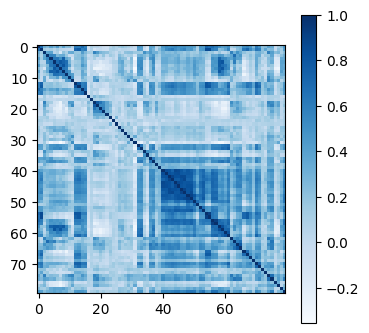

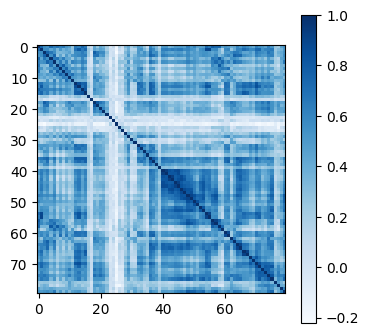

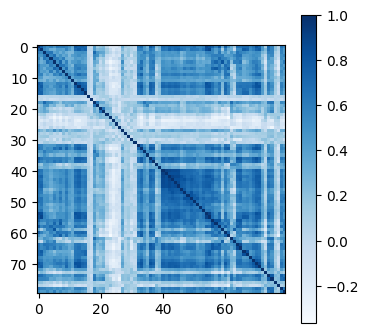

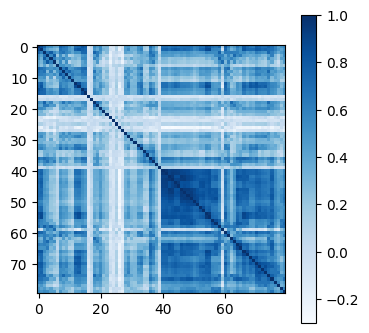

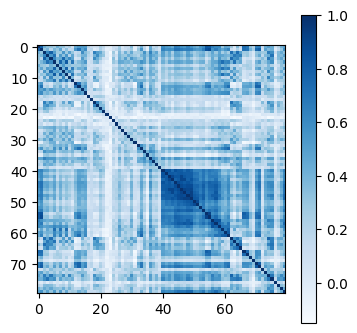

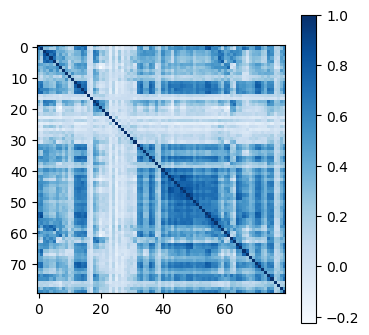

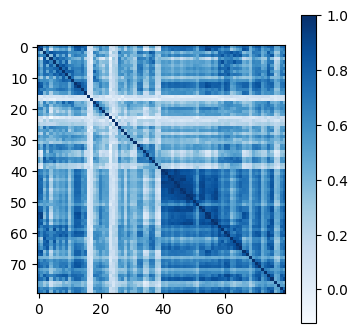

In [19]:
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt
import numpy as np
import seaborn

correlation_measure = ConnectivityMeasure(kind='correlation')
for ts in ds.BOLDs:
  figure = plt.figure(figsize=(4, 4))
  functional_connectivity = correlation_measure.fit_transform([ts.T])
  tcf = plt.imshow(np.squeeze(functional_connectivity), cmap=plt.cm.Blues)
  figure.colorbar(tcf)

The Dataset class also has some precomputed structural connectivity and delay matrices:

In [18]:
sc = ds.Cmat
dc = ds.Dmat
matrix_correlation = func.matrix_correlation(sc, dc)
print(matrix_correlation)

-0.5308216971718926


Your first task is to find out a way to compare two matrices. You can check the documentation for neurolib func module to find some very useful functions for this scope! help(func). How similar are the fc and sc?

Use the structural and delay matrices above to set up your HopfModel, like we did in the previous lecture/homework

In [21]:
model = HopfModel(Cmat=sc, Dmat=dc)
# We set a short duration for the simulation for the purpose of the exercise.
# if you want to simulate real data it should match the length of the scan
model.params.duration = 2 * 1000
model.params["K_gl"] = 1.0

Now your task is to find the model parameters (a) that best reproduce the empirical FC. Don't overthink it for the moment. Just think about the easiest way you know to try several model parameters one after the other... You previously found out how to compare two matrices. So, you should run the model each time with a different parameter, calculate its functional connectivity and compare it to the empirical one, and record the results

In [30]:
for a in np.arange(0.55, 0.9, 0.001):
  model.params['a'] = a
  model.run()
  correlation_measure = ConnectivityMeasure(kind='correlation')
  fc_model = correlation_measure.fit_transform([model.x.T])[0]
  fc_emp = correlation_measure.fit_transform([ts.T])[0]
  print(f"{a}: {func.matrix_correlation(fc_model, fc_emp)}")

0.55: 0.3437366188796836
0.551: 0.3430158543088271
0.552: 0.3474188857891079
0.553: 0.3341058303797151
0.554: 0.3507931218687043
0.555: 0.34474720061312597
0.556: 0.34367712072585166
0.557: 0.41875047456777725
0.558: 0.417134678343516
0.559: 0.4162470610205232
0.56: 0.34302804668929393
0.561: 0.3393482630763181
0.562: 0.3446916689194312
0.5630000000000001: 0.3403733975768717
0.5640000000000001: 0.3474858625377954
0.5650000000000001: 0.35023944459435974
0.5660000000000001: 0.3514411318505105
0.5670000000000001: 0.34771571692865433
0.5680000000000001: 0.3428081883759135
0.5690000000000001: 0.34650678139703
0.5700000000000001: 0.34627207402051935
0.5710000000000001: 0.4282013383596343
0.5720000000000001: 0.4286715372712818
0.5730000000000001: 0.42702071722732976
0.5740000000000001: 0.42619052257722195
0.5750000000000001: 0.35264764404325416
0.5760000000000001: 0.35122686444349915
0.5770000000000001: 0.3491751958774001
0.5780000000000001: 0.3581643663512805
0.5790000000000001: 0.3584818318

What is the a that maximizes the fit to the empirical data? Write down your answer:

Best a = 0.572 => correlation 0.4286715372712818


Now plot the empirical and simulated functional connectivities. Are they very similar or not? Why do you think so?

In [ ]:
# Your code here

## More advanced fitting

With Neurolib you can do some more advance fitting... This is not needed for our purposes, but if you are interested and you want to play around with it, you are more than welcome to do so! For example, using Neurolib you can run many simulations in parallel, which considerably speeds up the time and allows you to test out many more parameter combinations. Additionally, you can also use other methods rather than a grid search... Take a look at [this tutorial](https://github.com/neurolib-dev/neurolib/blob/master/examples/example-1.2-brain-network-exploration.ipynb) and [this one](https://github.com/neurolib-dev/neurolib/blob/master/examples/example-2-evolutionary-optimization-minimal.ipynb).